In [ ]:
#Import data wrangling and visualization tool
from __future__ import division

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from pandas_profiling import ProfileReport

from datetime import datetime, timedelta,date
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go



In [360]:
#read business table csv
business_df = pd.read_csv("C://Users/User/Desktop/businesses table.csv")
business_df.head()

,business_uuid,date_won,city,business_type,sub_group,partner_pos
0,1441080511293-5ce45dcd-b3ce-4dd9-9e6d-4047a667...,9/17/2015,Cape Town,sole_proprietor,Retail,0
1,1443451760034-b317d70b-47b3-44cc-8238-bc93474e...,9/28/2015,Randburg,sole_proprietor,"Food, Drink & Hospitality",0
2,1446269527540-68231650-1320-4ff9-943f-28412f8b...,11/6/2015,Cape Town,sole_proprietor,Retail,0
3,1446732341500-16b51c71-bf68-428d-a198-b63a8a97...,11/12/2015,Cape Town,sole_proprietor,Retail,0
4,1407937721690-22878388-e481-46cb-8384-5dea1658...,1/14/2015,Cape Town,NaN,"Food, drink and hospitality",0


In [361]:
#read transaction csv
transaction_df = pd.read_csv("C:/Users/User/Desktop/transaction_subset.csv")
transaction_df.head()

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607+00,credit_card,60.0,approved,18.68068,NaN,NaN,NaN
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052+00,credit_card,220.0,approved,16.37625,ios,E105,WiFi
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455+00,credit_card,90.0,approved,13.51605,ios,E105,WiFi
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.75+00,credit_card,135.0,approved,15.06118,ios,M010,WiFi
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047+00,credit_card,162.0,approved,14.81583,ios,M010,WiFi


In [405]:
business_df['business_uuid'].describe()

count                                                   698
unique                                                  698
top       1407937721690-22878388-e481-46cb-8384-5dea1658...
freq                                                      1
Name: business_uuid, dtype: object

In [406]:
transaction_df['transaction_uuid'].describe()

count                                                 42411
unique                                                42411
top       1420234467861-ca350801-001c-4df9-80f5-329e3f17...
freq                                                      1
Name: transaction_uuid, dtype: object

In [364]:
business_df.sort_values("business_uuid", inplace=True)
business_df.drop_duplicates(subset ="business_uuid", keep = False, inplace = True)

In [365]:
business_df['business_uuid'].describe()

count                                                   698
unique                                                  698
top       1407937721690-22878388-e481-46cb-8384-5dea1658...
freq                                                      1
Name: business_uuid, dtype: object

In [366]:
transaction_df.sort_values("transaction_uuid", inplace=True)
transaction_df.drop_duplicates(subset ="transaction_uuid", keep = False, inplace = True)

In [367]:
transaction_df['transaction_uuid'].describe()

count                                                 42411
unique                                                42411
top       1420234467861-ca350801-001c-4df9-80f5-329e3f17...
freq                                                      1
Name: transaction_uuid, dtype: object

<AxesSubplot:>

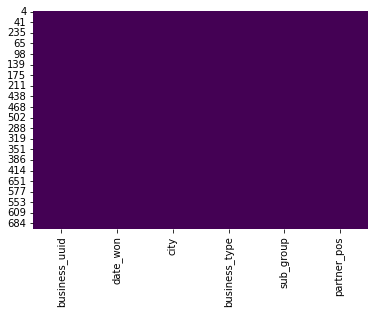

In [403]:
#visualize missing values in business data
sns.heatmap(business_df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

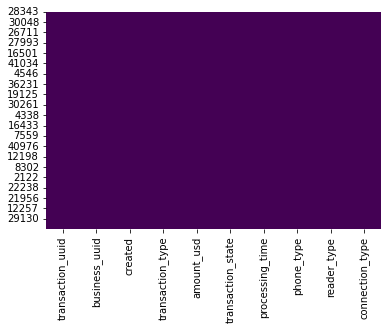

In [404]:
#visualize missing values in transaction data
sns.heatmap(transaction_df.isnull(),cbar=False,cmap='viridis')

In [381]:
# count number of Nan values in Business table
business_df.isnull().sum()

business_uuid    0
date_won         0
city             0
business_type    0
sub_group        0
partner_pos      0
dtype: int64

In [394]:
# count number of Nan values in Transaction table
transaction_df.isnull().sum()

transaction_uuid        0
business_uuid           0
created                 0
transaction_type        0
amount_usd              0
transaction_state       0
processing_time      4602
phone_type              0
reader_type             0
connection_type         0
dtype: int64

In [ ]:
transaction_df.isnull().sum()['created'].describe()

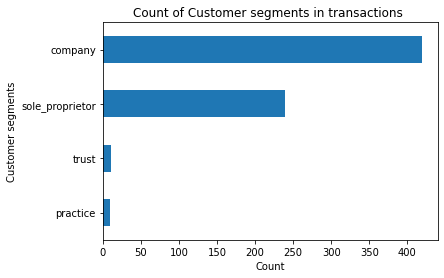

In [372]:
# key segments can be identified and percentage contribution -- % is better

business_df["business_type"].value_counts(ascending=True).plot.barh()
plt.xlabel("Count")
plt.ylabel("Customer segments")
plt.title("Count of Customer segments in transactions ");

In [373]:
#replace the Nan values with 'Other'
business_df['city'].replace(to_replace = np.nan, value = 'Other',inplace=True)
business_df['business_type'].replace(to_replace = np.nan, value = 'Other',inplace=True)


In [374]:
# Check for unique values in Transaction Dataframe

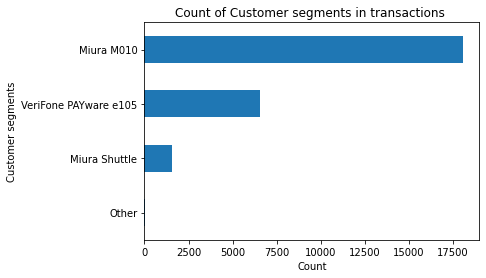

In [379]:
# key segments can be identified and percentage contribution -- % is better

transaction_df["reader_type"].value_counts(ascending=True).plot.barh()
plt.xlabel("Count")
plt.ylabel("Customer segments")
plt.title("Count of Customer segments in transactions ");

In [380]:
# phone_type
transaction_df['phone_type'] = transaction_df['phone_type'].replace(to_replace="ios",value="iOS")
transaction_df['phone_type'] = transaction_df['phone_type'].replace(to_replace="android",value="Android")
transaction_df['phone_type'].fillna(value='iOS', inplace=True)
#connection_type
transaction_df['connection_type'] = transaction_df['connection_type'].replace(to_replace="WiFi",value="Wi-Fi")
transaction_df['connection_type'].fillna(value='Wi-Fi', inplace=True)
#reader_type
transaction_df['reader_type'] = transaction_df['reader_type'].replace(to_replace="M010",value="Miura M010")
transaction_df['reader_type'] = transaction_df['reader_type'].replace(to_replace="E105",value="VeriFone PAYware e105")
transaction_df['reader_type'] = transaction_df['reader_type'].replace(to_replace="VeriFone E105",value="VeriFone PAYware e105")
transaction_df['reader_type'] = transaction_df['reader_type'].replace(to_replace="SHUTTLE",value="Miura Shuttle")
transaction_df['reader_type'] = transaction_df['reader_type'].replace(to_replace="Successfully connected to accessory",value="Other")
transaction_df['reader_type'].fillna(value='Miura M010', inplace=True)

In [400]:
#processing_time
transaction_df1 = transaction_df[transaction_df['processing_time'] > 0]
transaction_df['processing_time'].fillna(transaction_df['processing_time'].median(), inplace=True)

In [402]:
transaction_df.head()

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
28343,1420234467861-ca350801-001c-4df9-80f5-329e3f17...,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 21:34:27.859+00,credit_card,120.0,approved,15.09966,iOS,Miura M010,Wi-Fi
5887,1420235963890-4f47d7b4-b539-4c18-8ad1-47138ee2...,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 21:59:23.888+00,credit_card,135.0,error,15.09966,iOS,Miura M010,Wi-Fi
20198,1420242445944-bbd8760e-69d5-44c2-8cf5-fab7fd12...,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 23:47:25.942+00,credit_card,990.0,approved,15.09966,iOS,Miura M010,Wi-Fi
31717,1420273454047-5b23e57a-8654-4e2d-921f-9aaaa7ef...,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-01-03 08:24:14.046+00,cash,20.0,approved,15.09966,iOS,Miura M010,Wi-Fi
8121,1420276523107-3e3e824e-7094-4bd9-a90b-31226a3c...,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-01-03 09:15:23.105+00,cash,97.0,approved,15.09966,iOS,Miura M010,Wi-Fi


In [389]:
from pathlib import Path  
filepath = Path('folder/subfolder/posi.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
transaction_df1.to_csv(filepath)  

In [407]:
#join the two tables
joined_df = pd.merge(transaction_df, business_df, how='left', on = 'business_uuid')
joined_df.head()

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type,date_won,city,business_type,sub_group,partner_pos
0,1420234467861-ca350801-001c-4df9-80f5-329e3f17...,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 21:34:27.859+00,credit_card,120.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN,NaN
1,1420235963890-4f47d7b4-b539-4c18-8ad1-47138ee2...,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 21:59:23.888+00,credit_card,135.0,error,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN,NaN
2,1420242445944-bbd8760e-69d5-44c2-8cf5-fab7fd12...,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 23:47:25.942+00,credit_card,990.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN,NaN
3,1420273454047-5b23e57a-8654-4e2d-921f-9aaaa7ef...,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-01-03 08:24:14.046+00,cash,20.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN,NaN
4,1420276523107-3e3e824e-7094-4bd9-a90b-31226a3c...,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-01-03 09:15:23.105+00,cash,97.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN,NaN


In [412]:
joined_df['created'] = pd.to_datetime(joined_df['created'])

In [413]:
#remove Transaction ID
tx_uk = joined_df.filter(items=['business_uuid', 'created', 'transaction_type','amount_usd','transaction_state','processing_time','phone_type','reader_type','connection_type','date_won','city','business_type','sub_group'])
tx_uk.head()

,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type,date_won,city,business_type,sub_group
0,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 21:34:27.859000+00:00,credit_card,120.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN
1,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 21:59:23.888000+00:00,credit_card,135.0,error,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN
2,1418642457118-233d2f55-8bd1-457e-99e4-48666b72...,2015-01-02 23:47:25.942000+00:00,credit_card,990.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN
3,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-01-03 08:24:14.046000+00:00,cash,20.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN
4,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-01-03 09:15:23.105000+00:00,cash,97.0,approved,15.09966,iOS,Miura M010,Wi-Fi,NaN,NaN,NaN,NaN


In [ ]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
tx_user = pd.DataFrame(joined_df['business_uuid'].unique())
tx_user.columns = ['business_uuid']
tx_user.head()

tx_max_purchase = tx_uk.groupby('business_uuid').created.max().reset_index()
tx_max_purchase.columns = ['business_uuid','MaxPurchaseDate']
tx_max_purchase.info()

# Compare the last transaction of the dataset with last transaction dates of the individual customer IDs.
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_max_purchase.head()

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['business_uuid','Recency']], on='business_uuid')
tx_user.head()

#assign a recency score

from sklearn.cluster import KMeans

sse={} # error
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
tx_user['RecencyCluster'] = kmeans.fit_predict(tx_user[['Recency']])

tx_user.groupby('RecencyCluster')['Recency'].describe()

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

tx_user.groupby('RecencyCluster')['Recency'].describe()

# Frequency

#get order counts for each user and create a dataframe with it
tx_frequency = tx_uk.groupby('business_uuid').created.count().reset_index()
tx_frequency.columns = ['business_uuid','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='business_uuid')

from sklearn.cluster import KMeans

sse={} # error
tx_recency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

# Applying k-Means
kmeans=KMeans(n_clusters=4)
tx_user['FrequencyCluster']=kmeans.fit_predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency', tx_user, True )
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

#calculate revenue for each customer
tx_uk['Revenue'] = joined_df['Revenue'] = np.where(tx_uk['transaction_state'] == 'approved', tx_uk['amount_usd']*0.01, 0)
tx_revenue = tx_uk.groupby('business_uuid').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='business_uuid')

from sklearn.cluster import KMeans

sse={} # error
tx_recency = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

#apply clustering
kmeans = KMeans(n_clusters=4)
tx_user['RevenueCluster'] = kmeans.fit_predict(tx_user[['Revenue']])

#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>3,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>5,'Segment'] = 'High-Value' 

tx_user['CLV'] = tx_user['Revenue']-500

#plot LTV histogram
plot_data = [
    go.Histogram(
        x=tx_user['CLV']
    )
]

plot_layout = go.Layout(
        title='Customer Lifetime Value'
    
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# tx_user = tx_user.query("m6_Revenue < 50000") #because max values are ending at 50,000 as seen in graph above

plot_data = [
    go.Scatter(
        x=tx_user.query("Segment == 'Low-Value'")['OverallScore'],
        y=tx_user.query("Segment == 'Low-Value'")['CLV'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_user.query("Segment == 'Mid-Value'")['OverallScore'],
        y=tx_user.query("Segment == 'Mid-Value'")['CLV'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_user.query("Segment == 'High-Value'")['OverallScore'],
        y=tx_user.query("Segment == 'High-Value'")['CLV'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Customer LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


# tx_user = tx_user.query("m6_Revenue < 50000") #because max values are ending at 50,000 as seen in graph above

plot_data = [
    go.Scatter(
        x=tx_user.query("Segment == 'Low-Value'")['OverallScore'],
        y=tx_user.query("Segment == 'Low-Value'")['CLV'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_user.query("Segment == 'Mid-Value'")['OverallScore'],
        y=tx_user.query("Segment == 'Mid-Value'")['CLV'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_user.query("Segment == 'High-Value'")['OverallScore'],
        y=tx_user.query("Segment == 'High-Value'")['CLV'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Customer LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#remove outliers
tx_user = tx_user[tx_user['Revenue']<tx_user['Revenue'].quantile(0.99)]

#creating 3 clusters
kmeans = KMeans(n_clusters=3)
tx_user['LTVCluster'] = kmeans.fit_predict(tx_user[['Revenue']])

#order cluster number based on LTV
tx_user = order_cluster('LTVCluster', 'Revenue',tx_user,True)

#creatinga new cluster dataframe
tx_cluster = tx_user.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['Revenue'].describe()

#convert categorical columns to numerical
tx_class = tx_cluster.drop('business_uuid', inplace=True, axis=1)
tx_class = pd.get_dummies(tx_cluster) #There is only one categorical variable segment
tx_class.head()


In [ ]:
#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

In [ ]:
# tmp1 = tmp4.drop('transaction_uuid', inplace=True, axis=1)
# tmp2 = joined_df.drop('transaction_uuid', inplace=True, axis=1) 
tmp2 = pd.get_dummies(joined_df) #There is only one categorical variable segment

corr_matrix1 = tmp2.corr()
# corr_matrix1['LTVCluster'].sort_values(ascending=False)

corr_matrix1['Revenue'].sort_values(ascending=False)




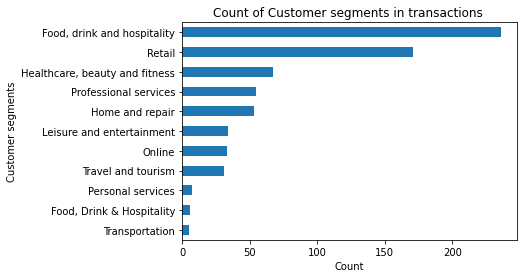

In [418]:
# key segments can be identified and percentage contribution -- % is better

business_df["sub_group"].value_counts(ascending=True).plot.barh()
plt.xlabel("Count")
plt.ylabel("Customer segments")
plt.title("Count of Customer segments in transactions ");